In [94]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [95]:
df = pd.read_csv("../data/regression-task/master-regression-dataset.csv", sep=';', lineterminator='\n')
df = df.drop(labels=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'High', 'Low', 'Close', 'Open', 'Volume', 'Timestamp'], axis=1)
df.head()

,Delta,Volatility,AvgVolatility,Momentum,positive_sentiment
0,-0.631500,0.000000,0.0,0.0,0.469450
1,0.418999,-0.005044,0.0,1.0,0.423330
2,1.206997,-0.042437,0.0,1.0,0.486872
3,0.843002,0.005326,0.0,0.0,0.505960
4,-0.531502,-0.000792,0.0,1.0,0.433893


In [96]:
features = ['Volatility', 'AvgVolatility', 'positive_sentiment']

In [97]:
# Classification
X, y = df[features], df['Momentum']
print(X.shape, y.shape)

(1675, 3) (1675,)


In [98]:
def plot_clf_learning_curve(clf, X, y, param=32):
    sample_points, train_scores, test_scores = learning_curve(estimator=clf, X=X, y=y, cv=10, scoring=make_scorer(accuracy_score))
    train_scores = np.average(train_scores, axis=1)
    test_scores = np.average(test_scores, axis=1)

    print(sample_points)

    plt.plot(sample_points, train_scores, label='Train scores')
    plt.plot(sample_points, test_scores, label='Test scores')
    plt.legend()
    plt.grid()
    # plt.title(f"Logistic regression learning curve, C = {param}")
    plt.show()

def plot_regression_validation_curve(X, y, hyperparams: list):
    train_scores = []
    test_scores = []
    for c in hyperparams:
        reg_clf = LogisticRegression(C=c)

        # get cross validation score
        # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
        cv_scores = cross_validate(reg_clf, X, y, cv=10, error_score='raise', scoring=make_scorer(accuracy_score), return_train_score=True)
        current_train_scores = cv_scores['train_score']
        current_test_scores = cv_scores['test_score']
        train_score = np.average(current_train_scores)
        test_score = np.average(current_test_scores)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"Logistic Regression with c {c} has mean validation train / test score of {train_score} / {test_score}")

    plt.plot(hyperparams, train_scores, label='Train scores')
    plt.plot(hyperparams, test_scores, label='Test scores')
    plt.grid()
    plt.legend()
    plt.title("Logistic regression validation curve")
    plt.show()

Logistic Regression with c 0.2 has mean validation train / test score of 0.5560862306583425 / 0.555827630453379
Logistic Regression with c 0.4 has mean validation train / test score of 0.5796348252804331 / 0.5767215568862276
Logistic Regression with c 0.6 has mean validation train / test score of 0.6181754817043013 / 0.6125427715996578
Logistic Regression with c 0.8 has mean validation train / test score of 0.6648084799670503 / 0.6626817792985458
Logistic Regression with c 1 has mean validation train / test score of 0.7031501533955599 / 0.6972946963216423
Logistic Regression with c 2 has mean validation train / test score of 0.8034487158952299 / 0.7999821785001425
Logistic Regression with c 4 has mean validation train / test score of 0.8738967048556778 / 0.8722055888223552
Logistic Regression with c 8 has mean validation train / test score of 0.9148921302709372 / 0.911641003706872
Logistic Regression with c 16 has mean validation train / test score of 0.9387728619228746 / 0.93790633019

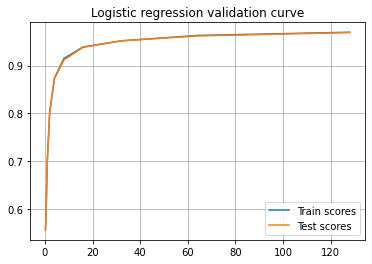

[ 150  489  828 1167 1507]


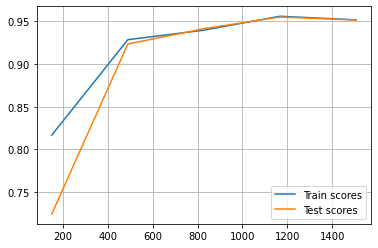

In [99]:
c_vals = [0.2, 0.4, 0.6, 0.8, 1, 2, 4, 8, 16, 32, 64, 128]
plot_regression_validation_curve(X, y, c_vals)
plot_clf_learning_curve(LogisticRegression(C=32), X, y)

In [100]:
def plot_svc_validation_curve(X, y, hyperparams: list, kernel='poly'):
    train_scores = []
    test_scores = []
    best_test_score = 0
    best_c = 1
    for c in hyperparams:
        clf = SVC(C=c, kernel=kernel)

        # get cross validation score
        # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
        cv_scores = cross_validate(clf, X, y, cv=10, error_score='raise', scoring=make_scorer(accuracy_score), return_train_score=True)
        current_train_scores = cv_scores['train_score']
        current_test_scores = cv_scores['test_score']
        train_score = np.average(current_train_scores)
        test_score = np.average(current_test_scores)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"SVC-{kernel} with c {c} has mean validation train / test score of {train_score} / {test_score}")
        if best_test_score < test_score:
            best_test_score = test_score
            best_c = c


    plt.plot(hyperparams, train_scores, label='Train scores')
    plt.plot(hyperparams, test_scores, label='Test scores')
    plt.grid()
    plt.legend()
    plt.title(f"SVC-{kernel} validation curve")
    plt.show()

    return best_c

SVC-linear with c 0.2 has mean validation train / test score of 0.5552239416762448 / 0.5552288280581694
SVC-linear with c 0.4 has mean validation train / test score of 0.5552239416762448 / 0.5552288280581694
SVC-linear with c 0.6 has mean validation train / test score of 0.5640463865356893 / 0.5641787852865697
SVC-linear with c 0.8 has mean validation train / test score of 0.5860030291882795 / 0.5844739093242086
SVC-linear with c 1 has mean validation train / test score of 0.6293197175339134 / 0.6238808098089537
SVC-linear with c 2 has mean validation train / test score of 0.815521465697655 / 0.8131201881950384
SVC-linear with c 4 has mean validation train / test score of 0.8949248775387714 / 0.8931209010550327
SVC-linear with c 8 has mean validation train / test score of 0.924179118138343 / 0.922394496720844
SVC-linear with c 16 has mean validation train / test score of 0.9407626478731439 / 0.9408932135728543
SVC-linear with c 32 has mean validation train / test score of 0.95854082363

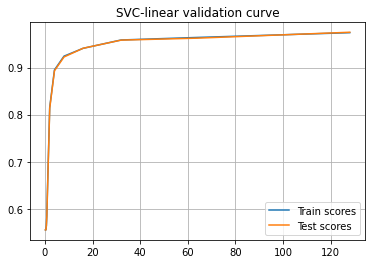

For kernel linear, best value for C: 128
[ 150  489  828 1167 1507]


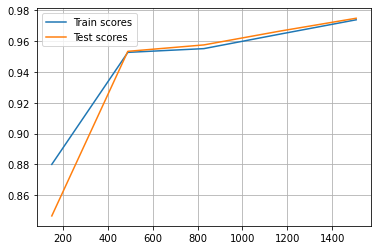

SVC-poly with c 0.2 has mean validation train / test score of 0.8458362302183092 / 0.8411498431708011
SVC-poly with c 0.4 has mean validation train / test score of 0.8979763314963416 / 0.8954982891360137
SVC-poly with c 0.6 has mean validation train / test score of 0.9248428201549268 / 0.9253457370972342
SVC-poly with c 0.8 has mean validation train / test score of 0.9328028000190095 / 0.9337147134302825
SVC-poly with c 1 has mean validation train / test score of 0.9383746319122608 / 0.9355075563159396
SVC-poly with c 2 has mean validation train / test score of 0.9611278665960267 / 0.9599836042201313
SVC-poly with c 4 has mean validation train / test score of 0.9701491184375655 / 0.9671407185628743
SVC-poly with c 8 has mean validation train / test score of 0.9755226273851998 / 0.9731144853150842
SVC-poly with c 16 has mean validation train / test score of 0.9775123693321527 / 0.9755061305959509
SVC-poly with c 32 has mean validation train / test score of 0.9820231492645286 / 0.9796941

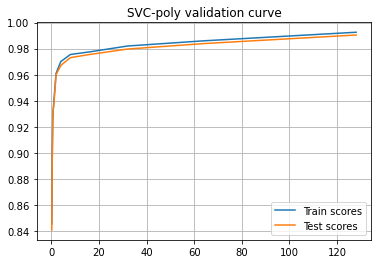

For kernel poly, best value for C: 128
[ 150  489  828 1167 1507]


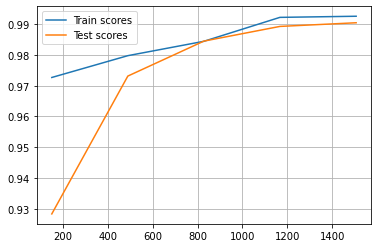

SVC-rbf with c 0.2 has mean validation train / test score of 0.8250071285372066 / 0.8172547761619617
SVC-rbf with c 0.4 has mean validation train / test score of 0.8918068025606409 / 0.8913138009694895
SVC-rbf with c 0.6 has mean validation train / test score of 0.9150245802523678 / 0.9110350727117194
SVC-rbf with c 0.8 has mean validation train / test score of 0.9278932620362269 / 0.9217814371257486
SVC-rbf with c 1 has mean validation train / test score of 0.9339299009573361 / 0.9325171086398634
SVC-rbf with c 2 has mean validation train / test score of 0.9519740327631091 / 0.9456337325349302
SVC-rbf with c 4 has mean validation train / test score of 0.9605972306072985 / 0.9522134302822926
SVC-rbf with c 8 has mean validation train / test score of 0.9671646815304001 / 0.9605717137154264
SVC-rbf with c 16 has mean validation train / test score of 0.9779771763600106 / 0.9743156544054749
SVC-rbf with c 32 has mean validation train / test score of 0.9832841962970329 / 0.9802929854576561


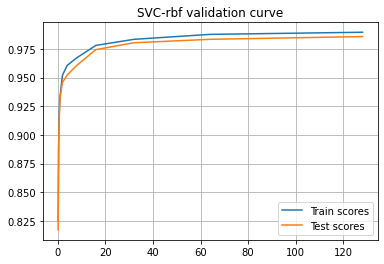

For kernel rbf, best value for C: 128
[ 150  489  828 1167 1507]


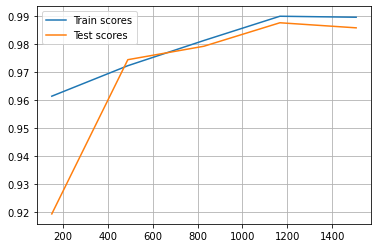

SVC-sigmoid with c 0.2 has mean validation train / test score of 0.5261030311244255 / 0.5061911890504704
SVC-sigmoid with c 0.4 has mean validation train / test score of 0.5232505161588977 / 0.5043947818648417
SVC-sigmoid with c 0.6 has mean validation train / test score of 0.5227197921635375 / 0.5038031080695751
SVC-sigmoid with c 0.8 has mean validation train / test score of 0.5223217381661882 / 0.5049935842600513
SVC-sigmoid with c 1 has mean validation train / test score of 0.5220566621900626 / 0.5037959794696321
SVC-sigmoid with c 2 has mean validation train / test score of 0.5213269551993439 / 0.5014114627887083
SVC-sigmoid with c 4 has mean validation train / test score of 0.5209952582026582 / 0.5020067008839464
SVC-sigmoid with c 8 has mean validation train / test score of 0.5204645342072978 / 0.5020067008839464
SVC-sigmoid with c 16 has mean validation train / test score of 0.5204644902039818 / 0.5020067008839464
SVC-sigmoid with c 32 has mean validation train / test score of 

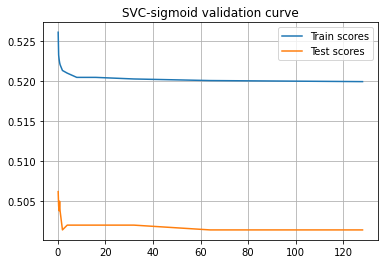

For kernel sigmoid, best value for C: 0.2
[ 150  489  828 1167 1507]


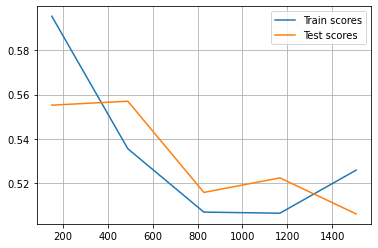

In [101]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_vals = [0.2, 0.4, 0.6, 0.8, 1, 2, 4, 8, 16, 32, 64, 128]

for kernel in kernels:
    best_c = plot_svc_validation_curve(X, y, c_vals, kernel=kernel)
    print("For kernel {}, best value for C: {}".format(kernel, best_c))
    plot_clf_learning_curve(SVC(C=best_c, kernel=kernel), X, y)

In [102]:
def plot_knn_validation_curve(X, y, hyperparams: list):
    train_scores = []
    test_scores = []
    best_test_score = 0
    best_c = 1
    for c in hyperparams:
        clf = KNeighborsClassifier(n_neighbors=c)

        # get cross validation score
        # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
        cv_scores = cross_validate(clf, X, y, cv=10, error_score='raise', scoring=make_scorer(accuracy_score), return_train_score=True)
        current_train_scores = cv_scores['train_score']
        current_test_scores = cv_scores['test_score']
        train_score = np.average(current_train_scores)
        test_score = np.average(current_test_scores)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"K-Neighbours Classifier with n_ngbrs {c} has mean validation train / test score of {train_score} / {test_score}")
        if best_test_score < test_score:
            best_test_score = test_score
            best_c = c


    plt.plot(hyperparams, train_scores, label='Train scores')
    plt.plot(hyperparams, test_scores, label='Test scores')
    plt.grid()
    plt.legend()
    plt.title(f"KNN validation curve")
    plt.show()

    return best_c

K-Neighbours Classifier with n_ngbrs 1 has mean validation train / test score of 1.0 / 0.9408575705731396
K-Neighbours Classifier with n_ngbrs 3 has mean validation train / test score of 0.9761854053321459 / 0.9354897348160822
K-Neighbours Classifier with n_ngbrs 5 has mean validation train / test score of 0.9690216214693941 / 0.9426468491588252
K-Neighbours Classifier with n_ngbrs 10 has mean validation train / test score of 0.96451070952707 / 0.9330873966353008
K-Neighbours Classifier with n_ngbrs 15 has mean validation train / test score of 0.9534993637120494 / 0.9270886797832907
K-Neighbours Classifier with n_ngbrs 20 has mean validation train / test score of 0.9550250466875184 / 0.9390575990875393
K-Neighbours Classifier with n_ngbrs 25 has mean validation train / test score of 0.9503816407604475 / 0.9277124322783006
K-Neighbours Classifier with n_ngbrs 30 has mean validation train / test score of 0.9507129857306046 / 0.9360742800114059
K-Neighbours Classifier with n_ngbrs 35 has 

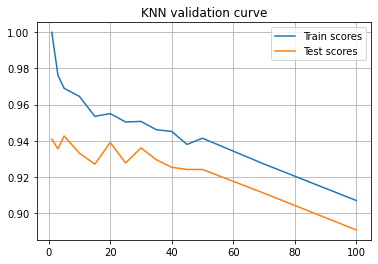

For kernel sigmoid, best value for C: 5
[ 150  489  828 1167 1507]


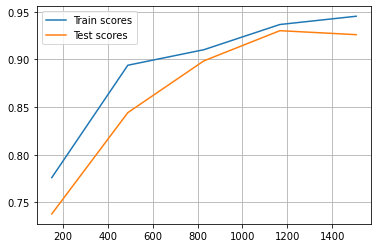

In [103]:
ngbr_vals = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 70, 100]

best_n = plot_knn_validation_curve(X, y, ngbr_vals)
print("For kernel {}, best value for C: {}".format(kernel, best_n))
# plot_clf_learning_curve(KNeighborsClassifier(n_neighbors=best_n), X, y)
plot_clf_learning_curve(KNeighborsClassifier(n_neighbors=40), X, y)